In [1]:
import numpy as np
import pylab as pl
import scipy
import matplotlib.pyplot as plt
import sys

import quicklens as ql

#print sys.path
sys.path.insert(0,'/home/mmunchmeyer/mlcmb_secondaries') 
import mlcmb
#print mlcmb.config.mlcmbpath

configpath=mlcmb.config.mlcmbpath+"/mlcmb/configs/config_master.ini" 
params = mlcmb.config.Parameters(configpath)

datasetid = params.datasetid

IMPORT ERROR: /usr/local/lib/python2.7/dist-packages/quicklens/mpi.pyc (No module named pypar). Could not load pbs or pypar. MPI will not be used.


In [2]:
#load test input data 
data_test_input = np.load(params.datapath+"datasets/dataset_test_"+str(datasetid)+".npy")
print (data_test_input.shape)

#load test output data
fname_results = params.folder_path_run+"dataset_test_"+str(datasetid)+"_results.npy"
data_test_result = np.load(fname_results)
print (data_test_result.shape)

#nsims = data_test_result.shape[0]
#print (data_test_result.shape)

(20, 128, 128, 3)
(20, 128, 128, 1)


# Inspect data set

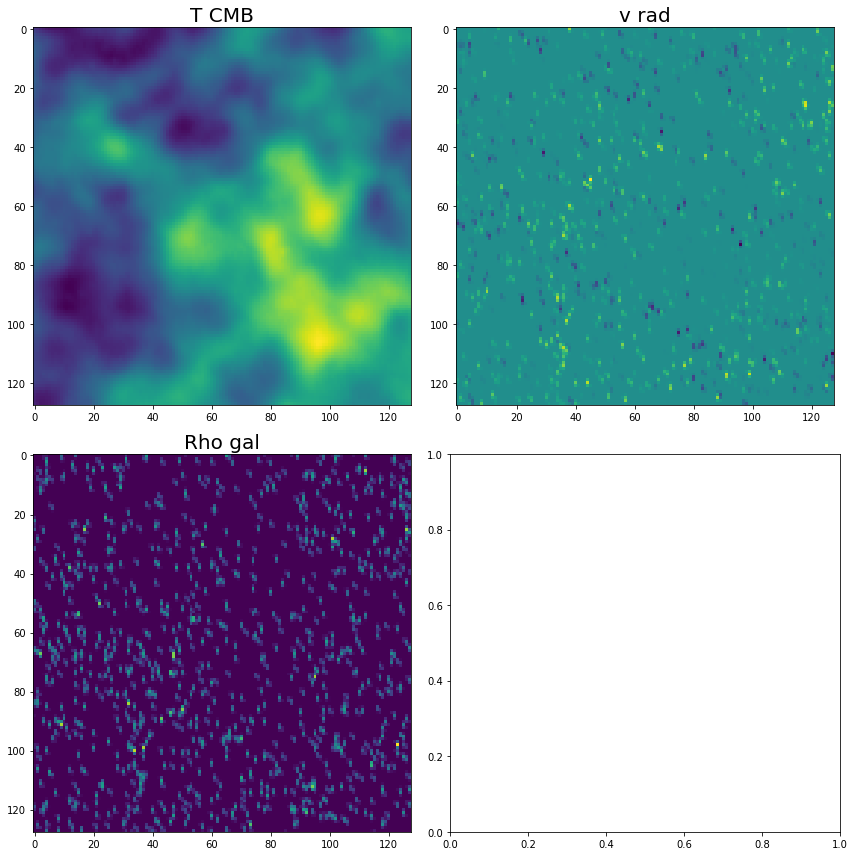

In [3]:
map_id = 0

fig, ax = plt.subplots(2, 2, figsize=(12, 12))

ax[0,0].imshow(data_test_input[map_id,:,:,0]) #, vmax=vmax, vmin=-vmax
ax[0,0].set_title(r'T CMB', fontsize=20)

ax[1,0].imshow(data_test_input[map_id,:,:,1])
ax[1,0].set_title(r'Rho gal', fontsize=20)

ax[0,1].imshow(data_test_input[map_id,:,:,2])
ax[0,1].set_title(r'v rad', fontsize=20)

fig.tight_layout()
#fig.savefig(params.folder_path_run+"maps_comparison_t.pdf")

# Inspect results

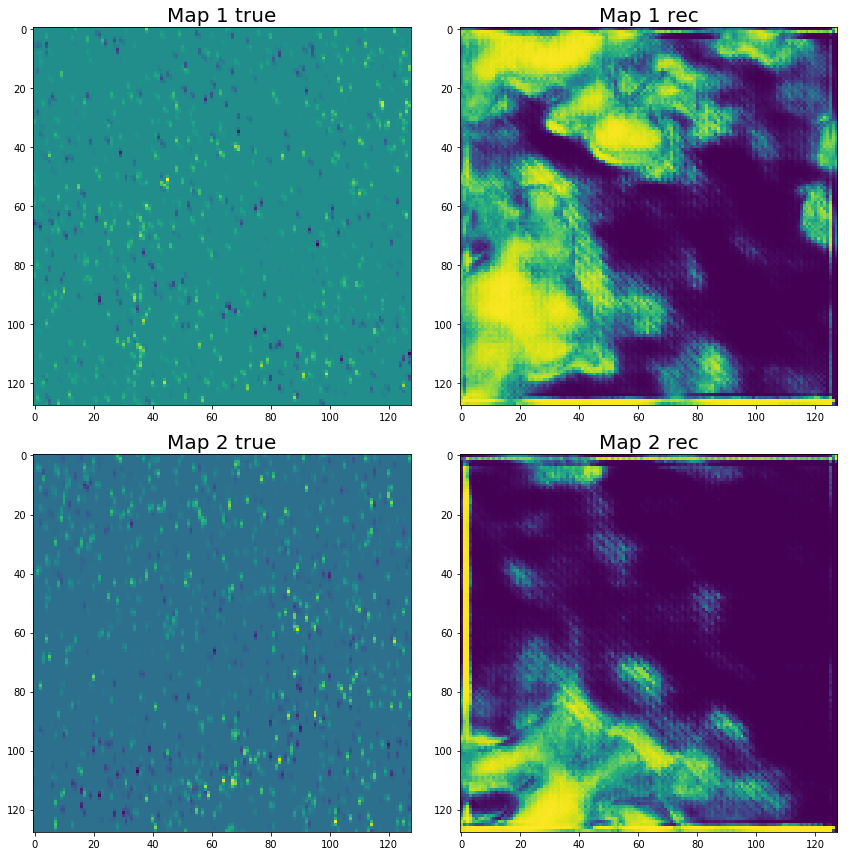

In [4]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

map_id = 0

ax[0,0].imshow(data_test_input[map_id,:,:,2])
ax[0,0].set_title(r'Map 1 true', fontsize=20)

ax[0,1].imshow(data_test_result[map_id,:,:,0])
ax[0,1].set_title(r'Map 1 rec', fontsize=20)

map_id = 1

ax[1,0].imshow(data_test_input[map_id,:,:,2]) #, vmax=vmax, vmin=-vmax
ax[1,0].set_title(r'Map 2 true', fontsize=20)

ax[1,1].imshow(data_test_result[map_id,:,:,0])
ax[1,1].set_title(r'Map 2 rec', fontsize=20)

fig.tight_layout()
#fig.savefig("maps_comparison_t_all.pdf")

## Calculate metrics

In [5]:
# #calculate mapWF correlation coeff
# nx = params.nx
# dx = params.dx
# lmax       = 4600 #params.lmax #5000 3000 #3500 #7000
# lbins      = np.linspace(100, lmax, 100) #np.linspace(100, lmax, 30)       # multipole bins.
# ell_binned = lbins[:-1] + np.diff(lbins)

# #mapWF
# corr_coeff_nn_avg = np.zeros(ell_binned.shape[0])
# corr_coeff_obs_avg = np.zeros(ell_binned.shape[0])
# auto_nn_avg = np.zeros(ell_binned.shape[0])
# auto_obs_avg = np.zeros(ell_binned.shape[0])
# auto_true_avg = np.zeros(ell_binned.shape[0])
# diffpower_nn_avg = np.zeros(ell_binned.shape[0])
# diffpower_obs_avg = np.zeros(ell_binned.shape[0])
# #R_nn_avg = np.zeros(ell_binned.shape[0])

# for map_id in range(nsims): 
#     #load maps
#     #dset5: t_sky, t_obs, mask, t_wf, e_sky, e_obs.emap, e_wf
    
#     if params.wf_mode=="T":
#         mapWF_true_map = data_test_input[map_id,:,:,3] 
#         mapNN_map = data_test_result[map_id,:,:,0]
#         mapObs_map = data_test_input[map_id,:,:,1] 
#     if params.wf_mode=="QU":
#         mapWF_true_map = data_test_input[map_id,:,:,14] #14,15
#         mapNN_map = data_test_result[map_id,:,:,0]
#         mapObs_map = data_test_input[map_id,:,:,10] #6,7    

#     #make these rmaps and get cffts from which we can get cls and mls
#     mapWF_true_cfft = ql.maps.rmap(nx, dx,map=mapWF_true_map).get_cfft()
#     mapNN_cfft = ql.maps.rmap(nx, dx,map=mapNN_map).get_cfft()
#     mapObs_cfft = ql.maps.rmap(nx, dx,map=mapObs_map).get_cfft()
    
#     #TEST
#     #mapObs_cfft = mapObs_cfft*mapObs_cfft.get_pix_transf()
#     #mapWF_true_cfft = mapWF_true_cfft*mapWF_true_cfft.get_pix_transf()
    
#     #cross powers
#     cross_map_cfft_nn = ql.maps.cfft( nx, dx, fft=(mapNN_cfft.fft * np.conj(mapWF_true_cfft.fft)) )
#     cross_power_nn = cross_map_cfft_nn.get_ml(lbins)  #use ml because the cfft already is a power/multiple of two maps    
#     cross_map_cfft_obs = ql.maps.cfft( nx, dx, fft=(mapObs_cfft.fft * np.conj(mapWF_true_cfft.fft)) )
#     cross_power_obs = cross_map_cfft_obs.get_ml(lbins)  #use ml because the cfft already is a power/multiple of two maps    
    
#     #auto powers
#     auto_true = mapWF_true_cfft.get_cl(lbins) #use cl because we really want the power of this map
#     auto_nn = mapNN_cfft.get_cl(lbins)
#     auto_obs = mapObs_cfft.get_cl(lbins)
#     auto_true_avg += auto_true.cl.real
#     auto_nn_avg += auto_nn.cl.real
#     auto_obs_avg += auto_obs.cl.real
    
#     #corr coeff from spectra
#     corr_coeff_nn = cross_power_nn.specs['cl']/(auto_nn.specs['cl']*auto_true.specs['cl'])**(1./2) 
#     corr_coeff_nn_avg += corr_coeff_nn.real
#     corr_coeff_obs = cross_power_obs.specs['cl']/(auto_obs.specs['cl']*auto_true.specs['cl'])**(1./2) 
#     corr_coeff_obs_avg += corr_coeff_obs.real
    
#     #NN renormalisation R
#     #R_nn = (cross_power_nn.specs['cl']/auto_true.specs['cl'])
#     #R_nn_avg += R_nn.real
        
#     #difference maps
#     diff_nn_cfft = mapNN_cfft - mapWF_true_cfft  
#     diff_obs_cfft = mapObs_cfft - mapWF_true_cfft 
#     diffpower_nn = diff_nn_cfft.get_cl(lbins) #use cl because we really want the power of this map
#     diffpower_obs = diff_obs_cfft.get_cl(lbins)
#     diffpower_nn_avg += diffpower_nn.cl.real
#     diffpower_obs_avg += diffpower_obs.cl.real    
 
# #averages
# corr_coeff_nn_avg = corr_coeff_nn_avg/nsims
# corr_coeff_obs_avg = corr_coeff_obs_avg/nsims
# auto_nn_avg = auto_nn_avg/nsims
# auto_true_avg = auto_true_avg/nsims
# auto_obs_avg = auto_obs_avg/nsims
# diffpower_nn_avg = diffpower_nn_avg/nsims
# diffpower_obs_avg = diffpower_obs_avg/nsims

# #renormalized powers
# #auto_nn_renorm = auto_nn_avg/R_nn_avg**2.
# #noises defined as  <est^2> = Cl + Nl
# #noise_nn_renorm = auto_nn_renorm - auto_true_avg 

In [6]:
# #cl power
# fig=plt.figure(figsize=(6,4))
# ax = fig.add_subplot(111)
# ax.plot(ell_binned,auto_nn_avg*ell_binned**2.,color='red',label='$C_\ell^{NN}$')
# #ax.plot(ell_binned,auto_nn_renorm*ell_binned**2.,color='red',label='$C_\ell^{NN}$ renorm',ls='dashed')
# ax.plot(ell_binned,auto_true_avg*ell_binned**2.,color='black',label=r'$C_\ell^{WF}$')
# ax.plot(ell_binned,auto_obs_avg*ell_binned**2.,color='blue',label=r'$C_\ell^{obs}$')
# plt.legend(loc=1,frameon=False,fontsize=14)
# ax.set_yscale('log')
# fig.tight_layout()
# plt.show()

In [7]:
# #cross correlation coefficient
# fig=plt.figure(figsize=(6,4))
# ax = fig.add_subplot(111)
# ax.plot(ell_binned,corr_coeff_nn_avg,color='red',label='$r_{WF,NN}$')
# ax.plot(ell_binned,corr_coeff_obs_avg,color='blue',label='$r_{WF,Obs}$')
# plt.legend(loc=1,frameon=False,fontsize=14)
# fig.tight_layout()
# plt.show()

In [8]:
# #1-cross correlation coefficient
# fig=plt.figure(figsize=(6,4))
# ax = fig.add_subplot(111)
# ax.plot(ell_binned,1-corr_coeff_nn_avg,color='red',label='$r_{WF,NN}$')
# ax.plot(ell_binned,1-corr_coeff_obs_avg,color='blue',label='$r_{WF,Obs}$')
# ax.set_yscale('log')
# plt.legend(loc=1,frameon=False,fontsize=14)
# fig.tight_layout()
# plt.show()

In [9]:
# #diff power
# fig=plt.figure(figsize=(6,8))
# ax2=fig.add_subplot(111)
# ax2.plot(ell_binned,diffpower_nn_avg/auto_true_avg,color='red',label='$\Delta_\ell^{NN}$')
# ax2.plot(ell_binned,diffpower_obs_avg/auto_true_avg,color='blue',label=r'$\Delta_\ell^{obs}$')
# ax2.set_yscale('log')
# ax2.set_ylim([0.001,10])
# plt.legend(loc=1,frameon=False,fontsize=14)
# fig.tight_layout()
# plt.show()

In [10]:
# cl_ql = ql.spec.get_camb_lensedcl(lmax=lmax) 
# ell_ql = np.arange(0,cl_ql.cltt.shape[0])
# cl_tt_ql = cl_ql.cltt
# bl = ql.spec.bl(fwhm_arcmin=params.fwhm_arcmin, lmax=lmax)
# nl_tt = (params.nlev_t*np.pi/180./60.)**2 #/ bl**2


# #cross correlation combi plot
# fig=plt.figure(figsize=(12,8))
# ax1=fig.add_subplot(221)
# ax1.plot(ell_binned,corr_coeff_nn_avg,color='red',label='$r_{WF,NN}$')
# ax1.plot(ell_binned,corr_coeff_obs_avg,color='blue',label='$r_{WF,Obs}$')
# plt.legend(loc=1,frameon=False,fontsize=14)
# ax1.set_ylabel('r', fontsize=20)
# ax2=fig.add_subplot(223)
# ax2.plot(ell_binned,1-corr_coeff_nn_avg,color='red',label='$r_{WF,NN}$')
# ax2.plot(ell_binned,1-corr_coeff_obs_avg,color='blue',label='$r_{WF,Obs}$')
# ax2.set_yscale('log')
# ax2.set_ylabel('1-r', fontsize=20)
# ax2.set_xlabel('$\ell$', fontsize=20)
# plt.legend(loc=1,frameon=False,fontsize=14)

# #cl power
# ax = fig.add_subplot(222)
# ax.plot(ell_binned,auto_nn_avg*ell_binned**2.,color='red',label='$C_\ell^{NN}$')
# ax.plot(ell_binned,auto_true_avg*ell_binned**2.,color='black',label=r'$C_\ell^{WF}$')
# ax.plot(ell_ql,cl_tt_ql*ell_ql**2.,color='green',label=r'$C_\ell^{sky}$')
# ax.plot(ell_ql,nl_tt*ell_ql**2.,color='green',ls='dashed',label=r'$N_\ell$')
# ax.plot(ell_binned,auto_obs_avg*ell_binned**2.,color='blue',label=r'$C_\ell^{obs}$')
# ax.set_ylabel('$\ell^2 C_\ell$', fontsize=20)
# plt.legend(loc=1,frameon=False,fontsize=14)
# ax.set_yscale('log')

# #diff power
# ax2=fig.add_subplot(224)
# ax2.plot(ell_binned,diffpower_nn_avg/auto_true_avg,color='red',label='$\Delta_\ell^{NN}$')
# ax2.plot(ell_binned,diffpower_obs_avg/auto_true_avg,color='blue',label=r'$\Delta_\ell^{obs}$')
# ax2.set_yscale('log')
# #ax2.set_ylim([0.001,10])
# ax2.set_xlabel('$\ell$', fontsize=20)
# ax2.set_ylabel('$\Delta_\ell$', fontsize=20)
# plt.legend(loc=1,frameon=False,fontsize=14)
# fig.tight_layout()
# plt.show()

# #fig.savefig(params.folder_path_run+"quality_measures_t_large.pdf")
# fig.savefig(params.folder_path_run+"quality_measures_t.pdf")
# fig.savefig("quality_measures_t.pdf")